<a href="https://colab.research.google.com/github/AlinaStudyPM/UniversityML/blob/main/MyML_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Читаем и преобразовываем данные

In [15]:
#Читаем данные из файла
data = pd.read_excel('Потребление электроэнергии на юго-востоке Бразилии.xls')
data

,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,...,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
0,656518.039202,723192.969315,818306.259787,898910.328976,1.027720e+06,1.012580e+06,1.061824e+06,1.084292e+06,1.197381e+06,1.278430e+06,...,967520.994628,1.020786e+06,1.070603e+06,1.197483e+06,1.260629e+06,1.300039e+06,1.381843e+06,1.405459e+06,1.566660e+06,1.088329e+06


In [16]:
#Транспонируем, чтобы даты были индексом
data = data.transpose()
data.columns = ['Consumption']
data

,Consumption
2009-01-01,6.565180e+05
2009-02-01,7.231930e+05
2009-03-01,8.183063e+05
2009-04-01,8.989103e+05
2009-05-01,1.027720e+06
...,...
2016-08-01,1.300039e+06
2016-09-01,1.381843e+06
2016-10-01,1.405459e+06
2016-11-01,1.566660e+06


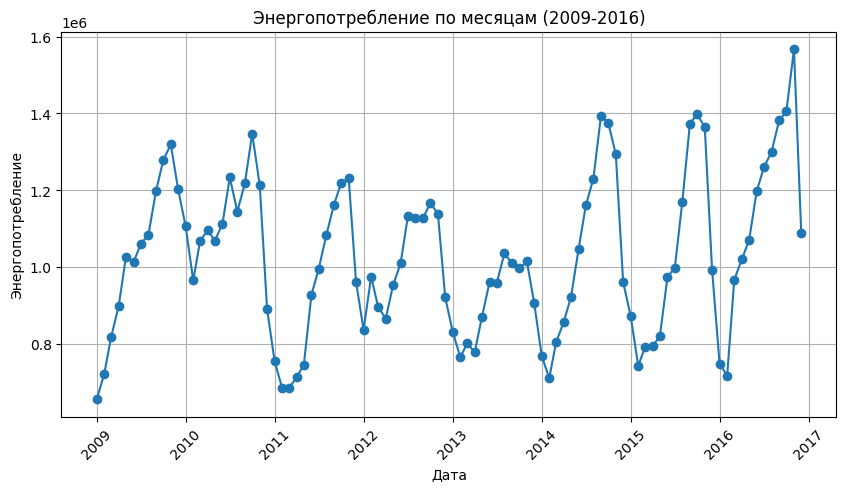

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Consumption'], marker='o')
plt.title('Энергопотребление по месяцам (2009-2016)')
plt.xlabel('Дата')
plt.ylabel('Энергопотребление')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Разделяем данные на обучающую и тестовую выборку???

In [22]:
data_train = data[data.index < '2015-01-01']
data_test = data[data.index >= '2015-01-01']

Строим модель

In [55]:
model = ExponentialSmoothing(data_train['Consumption'], trend='mul', seasonal='add', seasonal_periods=12)
fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
forecast = fit.forecast(24)
forecast

,0
2015-01-01,8.718625e+05
2015-02-01,8.504069e+05
2015-03-01,8.790829e+05
2015-04-01,8.961929e+05
2015-05-01,9.600524e+05
2015-06-01,1.071285e+06
2015-07-01,1.159126e+06
2015-08-01,1.172859e+06
2015-09-01,1.250730e+06
2015-10-01,1.341089e+06


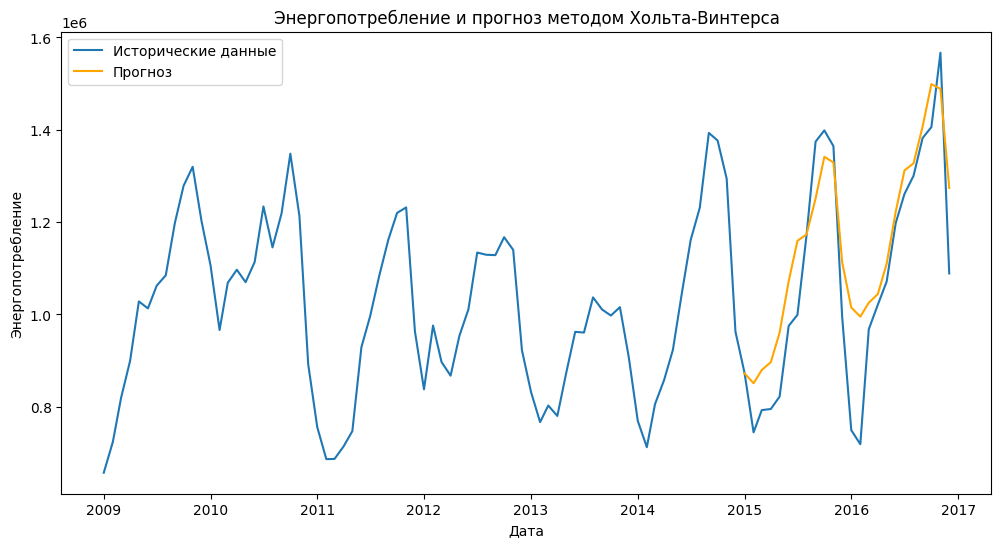

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(data['Consumption'], label='Исторические данные')
plt.plot(forecast, label='Прогноз', color='orange')
plt.title('Энергопотребление и прогноз методом Хольта-Винтерса')
plt.xlabel('Дата')
plt.ylabel('Энергопотребление')
plt.legend()
plt.show()

Оценка качества прогнозирования

In [44]:
def r_squared(y_true, y_pred):
    """Вычисляет коэффициент детерминации R²"""
    ss_residual = np.sum((y_true - y_pred)**2)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_residual / ss_total)

def mean_absolute_error(y_true, y_pred):
    """Вычисляет среднюю абсолютную ошибку (MAE)"""
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    """Вычисляет корень среднеквадратичной ошибки (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mean_absolute_percentage_error(y_true, y_pred):
    """Вычисляет среднее абсолютное процентное отклонение (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
y_true = data_test['Consumption'].values
y_pred = forecast.values

# Вычисление метрик
r2_value = r_squared(y_true, y_pred)
mae_value = mean_absolute_error(y_true, y_pred)
rmse_value = root_mean_squared_error(y_true, y_pred)
mape_value = mean_absolute_percentage_error(y_true, y_pred)

print(f"R²: {r2_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")
print(f"MAPE: {mape_value:.2f}%")

R²: 0.79
MAE: 86696.22
RMSE: 113555.43
MAPE: 9.37%


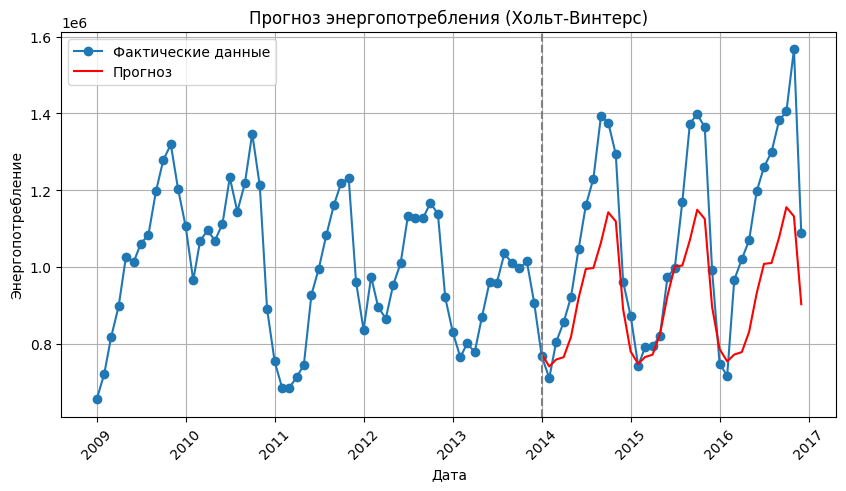

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Consumption'], marker='o', label='Фактические данные')
plt.plot(forecast.index, forecast, color='red', label='Прогноз')
plt.title('Прогноз энергопотребления (Хольт-Винтерс)')
plt.xlabel('Дата')
plt.ylabel('Энергопотребление')
plt.axvline(x=pd.to_datetime('2014-01-01'), color='grey', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()